In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

df = pd.read_csv("crt_with_model_responses3.csv")
MODEL_TO_SIZE = {
    "gemma-7b": 7,
    "llama-3-8b": 8,
    "mixtral-8x7b": 42,
    "llama-3-70b": 70,
    "phi-3-mini": 3.8,
    "gemma-2b": 2,
}
MODELS = list(MODEL_TO_SIZE.keys())

In [11]:
df.iloc[21]["Question"]

'A book and a lamp together cost $170. The book costs $100 more than the lamp. How much does the lamp cost?'

<Axes: >

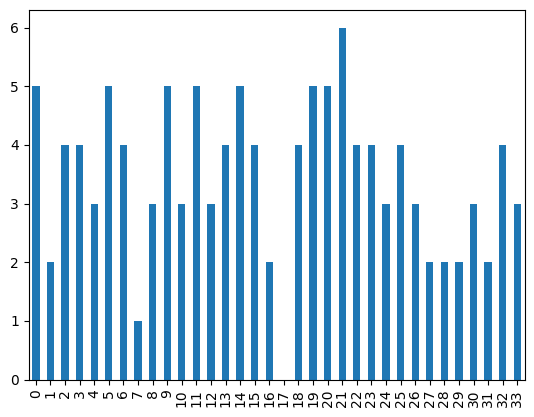

In [9]:
df[[f"{model}-correct" for model in MODELS]].sum(axis=1).plot.bar()

Pearson's correlation coefficient: 0.7676987103451444
Pearson's correlation coefficient: 0.7676987103451444
p-value: 0.07467789323785577
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     5.741
Date:                Sun, 16 Jun 2024   Prob (F-statistic):             0.0747
Time:                        22:34:22   Log-Likelihood:                 3.3354
No. Observations:                   6   AIC:                            -2.671
Df Residuals:                       4   BIC:                            -3.087
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

/Users/wojciechachtelik/Documents/studia/kognitywistyka/cognitive-reflection-llm/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


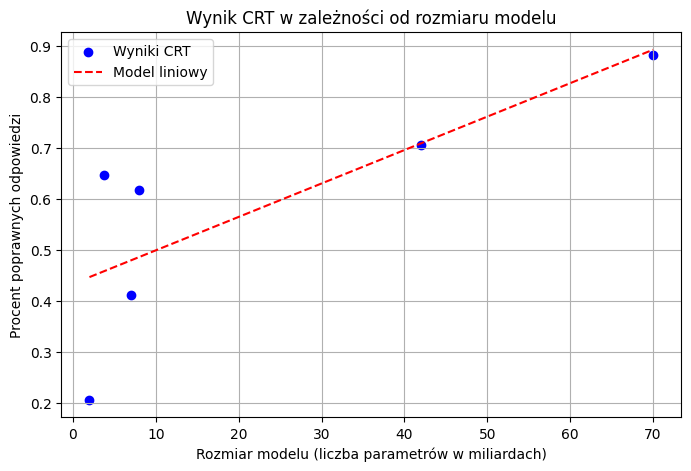

In [2]:
results = df[[f"{model}-correct" for model in MODELS]].mean()

model_size_to_crt_score = {}
for name, value in zip(results.index, results):
    model_size_to_crt_score[MODEL_TO_SIZE[name.replace("-correct", "")]] = value

model_size_with_crt_score = sorted(model_size_to_crt_score.items(), key=lambda x: x[0])
model_sizes = [x[0] for x in model_size_with_crt_score]
crt_scores = [x[1] for x in model_size_with_crt_score]

correlation_coefficient = np.corrcoef(model_sizes, crt_scores)[0, 1]
print("Pearson's correlation coefficient:", correlation_coefficient)

corr_coefficient, p_value = pearsonr(model_sizes, crt_scores)
print("Pearson's correlation coefficient:", corr_coefficient)
print("p-value:", p_value)

model_size_with_const = sm.add_constant(model_sizes)
model = sm.OLS(crt_scores, model_size_with_const)
results = model.fit()

# Print out the statistics
print(results.summary())

# Generate fitted values from the regression
fitted_values = results.predict(model_size_with_const)
# Plotting the data
plt.figure(figsize=(8, 5))
plt.scatter(model_sizes, crt_scores, color='blue', label='Wyniki CRT')
plt.plot(model_sizes, fitted_values, 'r--', label='Model liniowy')
plt.title('Wynik CRT w zależności od rozmiaru modelu')
plt.xlabel('Rozmiar modelu (liczba parametrów w miliardach)')
plt.ylabel('Procent poprawnych odpowiedzi')
plt.legend()
plt.grid(True)
plt.savefig("correct_lin_reg.png")

Pearson's correlation coefficient: -0.7464429511222401
p-value: 0.08828602499438604
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     5.033
Date:                Tue, 07 May 2024   Prob (F-statistic):             0.0883
Time:                        09:18:26   Log-Likelihood:                 7.2131
No. Observations:                   6   AIC:                            -10.43
Df Residuals:                       4   BIC:                            -10.84
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

/Users/wojciechachtelik/Documents/studia/kognitywistyka/cognitive-reflection-llm/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


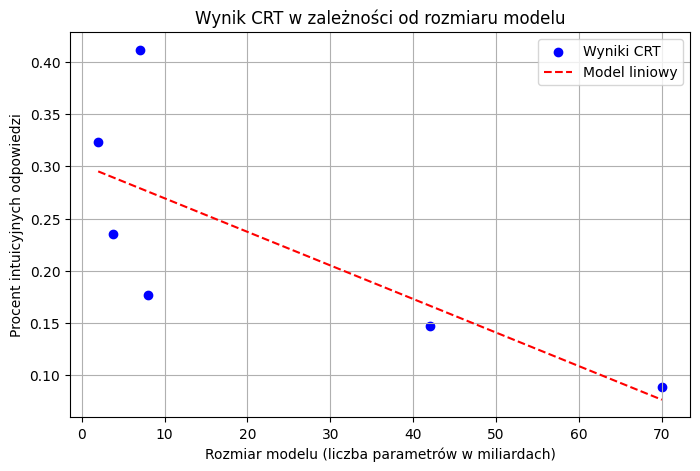

In [3]:
results = df[[f"{model}-intuitive" for model in MODELS]].mean()

model_size_to_crt_score = {}
for name, value in zip(results.index, results):
    model_size_to_crt_score[MODEL_TO_SIZE[name.replace("-intuitive", "")]] = value

model_size_with_crt_score = sorted(model_size_to_crt_score.items(), key=lambda x: x[0])
model_sizes = [x[0] for x in model_size_with_crt_score]
crt_scores = [x[1] for x in model_size_with_crt_score]

corr_coefficient, p_value = pearsonr(model_sizes, crt_scores)
print("Pearson's correlation coefficient:", corr_coefficient)
print("p-value:", p_value)

model_size_with_const = sm.add_constant(model_sizes)
model = sm.OLS(crt_scores, model_size_with_const)
results = model.fit()

# Print out the statistics
print(results.summary())

# Generate fitted values from the regression
fitted_values = results.predict(model_size_with_const)
# Plotting the data
plt.figure(figsize=(8, 5))
plt.scatter(model_sizes, crt_scores, color='blue', label='Wyniki CRT')
plt.plot(model_sizes, fitted_values, 'r--', label='Model liniowy')
plt.title('Wynik CRT w zależności od rozmiaru modelu')
plt.xlabel('Rozmiar modelu (liczba parametrów w miliardach)')
plt.ylabel('Procent intuicyjnych odpowiedzi')
plt.legend()
plt.grid(True)
plt.savefig("intuitive_lin_reg.png")

In [4]:
df[[f"{model}-correct" for model in MODELS]].mean().sort_values()

gemma-2b-correct        0.205882
gemma-7b-correct        0.411765
llama-3-8b-correct      0.617647
phi-3-mini-correct      0.647059
mixtral-8x7b-correct    0.705882
llama-3-70b-correct     0.882353
dtype: float64

In [5]:
df[[f"{model}-intuitive" for model in MODELS]].mean().sort_values()

llama-3-70b-intuitive     0.088235
mixtral-8x7b-intuitive    0.147059
llama-3-8b-intuitive      0.176471
phi-3-mini-intuitive      0.235294
gemma-2b-intuitive        0.323529
gemma-7b-intuitive        0.411765
dtype: float64

In [9]:
correct_responses_df = df[[f"{model}-correct" for model in MODELS]]
questions_without_correct_answers = correct_responses_df[
    (correct_responses_df != 1).all(axis=1)
].index.to_list()
for question in df["Question"][questions_without_correct_answers]:
    print(question)

Is it ethical for a woman to marry her widower's brother?


/var/folders/p9/5j58z6817c7662q03p997nth0000gn/T/ipykernel_40158/3419315909.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[MODELS].applymap(len).boxplot(figsize=(10, 5))


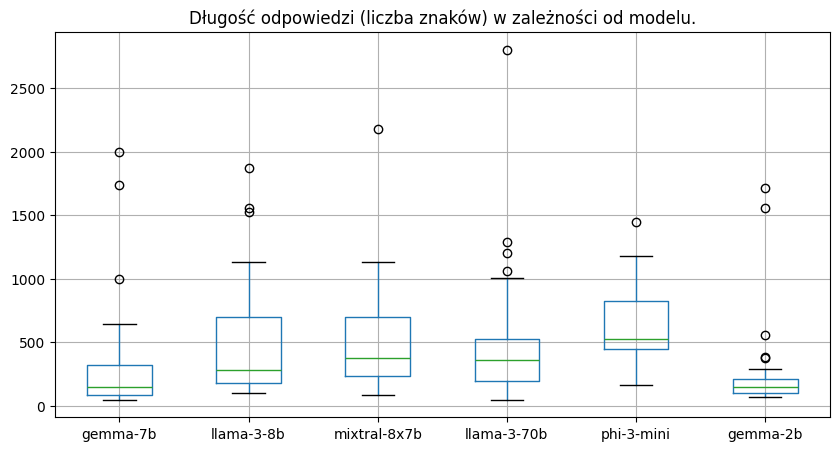

In [6]:
df[MODELS].applymap(len).boxplot(figsize=(10, 5))
plt.title("Długość odpowiedzi (liczba znaków) w zależności od modelu.")
plt.savefig("response_length.png")

In [10]:
mean_length

gemma-7b        330.176471
llama-3-8b      498.470588
mixtral-8x7b    504.794118
llama-3-70b     489.647059
phi-3-mini      641.000000
gemma-2b        256.176471
dtype: float64

In [13]:
df[[f"{model}-correct" for model in MODELS]].mean()

gemma-7b-correct        0.411765
llama-3-8b-correct      0.617647
mixtral-8x7b-correct    0.705882
llama-3-70b-correct     0.882353
phi-3-mini-correct      0.647059
gemma-2b-correct        0.205882
dtype: float64

In [12]:
model_length_to_crt_score

{330.1764705882353: 0.4117647058823529,
 498.47058823529414: 0.6176470588235294,
 504.79411764705884: 0.7058823529411765,
 489.6470588235294: 0.8823529411764706,
 641.0: 0.6470588235294118,
 256.1764705882353: 0.20588235294117646}

Pearson's correlation coefficient: 0.7708824550936992
Pearson's correlation coefficient: 0.7708824550936991
p-value: 0.07272852857030472
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     5.859
Date:                Tue, 07 May 2024   Prob (F-statistic):             0.0727
Time:                        09:26:47   Log-Likelihood:                 3.3714
No. Observations:                   6   AIC:                            -2.743
Df Residuals:                       4   BIC:                            -3.159
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0

/var/folders/p9/5j58z6817c7662q03p997nth0000gn/T/ipykernel_40158/380374791.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mean_length = df[MODELS].applymap(len).mean()
/Users/wojciechachtelik/Documents/studia/kognitywistyka/cognitive-reflection-llm/.venv/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


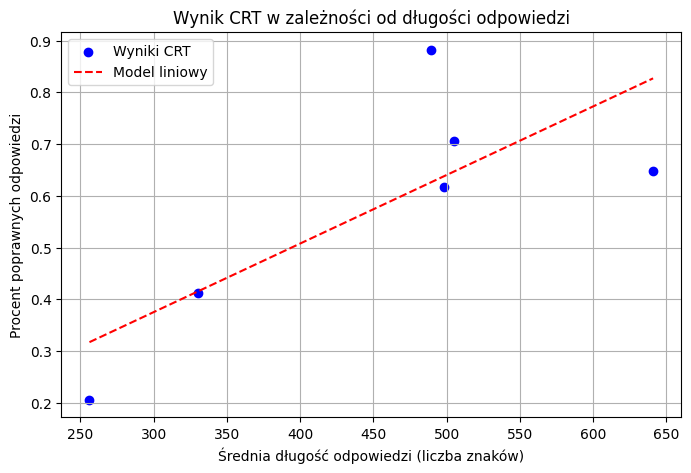

In [9]:
mean_length = df[MODELS].applymap(len).mean()

results = df[[f"{model}-correct" for model in MODELS]].mean()

model_length_to_crt_score = {}
for name, value in zip(mean_length.index, mean_length):
    model_length_to_crt_score[value] = results[f"{name}-correct"]

model_length_with_crt_score = sorted(
    model_length_to_crt_score.items(), key=lambda x: x[0]
)
model_length = [x[0] for x in model_length_with_crt_score]
crt_scores = [x[1] for x in model_length_with_crt_score]

correlation_coefficient = np.corrcoef(model_length, crt_scores)[0, 1]
print("Pearson's correlation coefficient:", correlation_coefficient)

corr_coefficient, p_value = pearsonr(model_length, crt_scores)
print("Pearson's correlation coefficient:", corr_coefficient)
print("p-value:", p_value)

model_length_with_const = sm.add_constant(model_length)
model = sm.OLS(crt_scores, model_length_with_const)
results = model.fit()

# Print out the statistics
print(results.summary())

# Generate fitted values from the regression
fitted_values = results.predict(model_length_with_const)
# Plotting the data
plt.figure(figsize=(8, 5))
plt.scatter(model_length, crt_scores, color="blue", label="Wyniki CRT")
plt.plot(model_length, fitted_values, "r--", label="Model liniowy")
plt.title("Wynik CRT w zależności od długości odpowiedzi")
plt.xlabel("Średnia długość odpowiedzi (liczba znaków)")
plt.ylabel("Procent poprawnych odpowiedzi")
plt.legend()
plt.grid(True)
plt.savefig("length_lin_reg.png")

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

cot_df = pd.read_csv("cot_with_model_responses2.csv")
agent_df = pd.read_csv("agent_with_model_responses2.csv")
MODEL_TO_SIZE = {
    "gemma-7b": 7,
    "llama3-8b": 8,
    "mixtral-8x7b": 42,
    "llama3-70b": 70,
}
MODELS = list(MODEL_TO_SIZE.keys())

In [8]:
df[[f"{model}-correct" for model in MODELS]].mean()

gemma-7b-correct        0.411765
llama-3-8b-correct      0.617647
mixtral-8x7b-correct    0.705882
llama-3-70b-correct     0.882353
phi-3-mini-correct      0.647059
gemma-2b-correct        0.205882
dtype: float64

In [10]:
cot_df[[f"{model}-correct" for model in MODELS]].mean()

gemma-7b-correct        0.411765
llama3-8b-correct       0.588235
mixtral-8x7b-correct    0.735294
llama3-70b-correct      0.852941
dtype: float64

In [11]:
agent_df[[f"{model}-correct" for model in MODELS]].mean()

gemma-7b-correct        0.441176
llama3-8b-correct       0.588235
mixtral-8x7b-correct    0.735294
llama3-70b-correct      0.794118
dtype: float64

In [25]:
df[[f"{model}-intuitive" for model in MODELS]].mean()

gemma-7b-intuitive        0.411765
llama-3-8b-intuitive      0.176471
mixtral-8x7b-intuitive    0.147059
llama-3-70b-intuitive     0.088235
phi-3-mini-intuitive      0.235294
gemma-2b-intuitive        0.323529
dtype: float64

In [13]:
cot_df[[f"{model}-intuitive" for model in MODELS]].mean()

gemma-7b-intuitive        0.529412
llama3-8b-intuitive       0.382353
mixtral-8x7b-intuitive    0.264706
llama3-70b-intuitive      0.147059
dtype: float64

In [14]:
agent_df[[f"{model}-intuitive" for model in MODELS]].mean()

gemma-7b-intuitive        0.470588
llama3-8b-intuitive       0.235294
mixtral-8x7b-intuitive    0.147059
llama3-70b-intuitive      0.147059
dtype: float64